In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

import sys
sys.path.append("src")

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [3]:
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})

In [4]:
palette = sb.color_palette("colorblind")
palette

[(0.00392156862745098, 0.45098039215686275, 0.6980392156862745),
 (0.8705882352941177, 0.5607843137254902, 0.0196078431372549),
 (0.00784313725490196, 0.6196078431372549, 0.45098039215686275),
 (0.8352941176470589, 0.3686274509803922, 0.0),
 (0.8, 0.47058823529411764, 0.7372549019607844),
 (0.792156862745098, 0.5686274509803921, 0.3803921568627451),
 (0.984313725490196, 0.6862745098039216, 0.8941176470588236),
 (0.5803921568627451, 0.5803921568627451, 0.5803921568627451),
 (0.9254901960784314, 0.8823529411764706, 0.2),
 (0.33725490196078434, 0.7058823529411765, 0.9137254901960784)]

In [5]:
method_colours = { "Neuromap"  : sb.color_palette()[0]
                 , "DMoN"      : sb.color_palette()[1]
                 , "NOCD"      : sb.color_palette()[2]
                 , "DiffPool"  : sb.color_palette()[3]
                 , "MinCut"    : sb.color_palette()[4]
                 , "Ortho"     : sb.color_palette()[5]
                 , "Infomap"   : sb.color_palette()[7]
                 }

methods = list(method_colours.keys())

In [6]:
arch_shapes = { "lin"     : "$-$"
              , "mlp"     : "^"
              , "gin"     : "s"
              , "gcn"     : "o"
              , "sage"    : "v"
              , "infomap" : "*"
              }

arch_labels = { "lin"     : "Linear"
              , "mlp"     : "MLP"
              , "gin"     : "GIN"
              , "gcn"     : "GCN"
              , "sage"    : "SAGE"
              , "infomap" : "Infomap"
              }

In [7]:
true_number_of_communities = { "cora"     :  7
                             , "citeseer" :  6
                             , "pubmed"   :  3
                             , "pc"       : 10
                             , "photo"    :  8
                             , "cs"       : 15
                             , "physics"  :  5
                             , "cora_ml"  :  7
                             , "wiki_cs"  : 10
                             , "arxiv"    : 40
                             }

In [8]:
max_allowed_number_of_communities = { "cora"     :  52
                                    , "citeseer" :  58
                                    , "pubmed"   : 140
                                    , "pc"       : 117
                                    , "photo"    :  87
                                    , "cs"       : 135
                                    , "physics"  : 186
                                    , "cora_ml"  :  55
                                    , "wiki_cs"  : 108
                                    , "arxiv"    : 412
                                    }

## Results for $4\sqrt{n}$ hidden channels and setting $s = \sqrt(n)$

In [9]:
cora     = pd.read_csv("results/real-world/Cora.csv", index_col = None)
citeseer = pd.read_csv("results/real-world/CiteSeer.csv", index_col = None)
pubmed   = pd.read_csv("results/real-world/PubMed.csv", index_col = None)
pc       = pd.read_csv("results/real-world/PC.csv")
photo    = pd.read_csv("results/real-world/Photo.csv")
cs       = pd.read_csv("results/real-world/CS.csv")
physics  = pd.read_csv("results/real-world/Physics.csv")
cora_ml  = pd.read_csv("results/real-world/Cora-ML.csv")
wiki_cs  = pd.read_csv("results/real-world/WikiCS.csv")
arxiv    = pd.read_csv("results/real-world/arxiv.csv")

cora["dataset"]     = "Cora"
citeseer["dataset"] = "CiteSeer"
pubmed["dataset"]   = "Pubmed"
pc["dataset"]       = "PC"
photo["dataset"]    = "Photo"
cs["dataset"]       = "CS"
physics["dataset"]  = "Physics"
cora_ml["dataset"]  = "Cora ML"
wiki_cs["dataset"]  = "Wiki CS"
arxiv["dataset"]    = "ogb-arxiv"

In [10]:
part1 = pd.concat([cora, citeseer, pubmed, pc, photo])
part2 = pd.concat([cs, physics, cora_ml, wiki_cs, arxiv])

molten_part_1 = pd.melt(part1, id_vars = ["method", "arch", "dataset"], value_vars = "avg ami")
molten_part_1 = pd.concat([molten_part_1[molten_part_1.method == method] for method in methods])

molten_part_2 = pd.melt(part2, id_vars = ["method", "arch", "dataset"], value_vars = "avg ami")
molten_part_2 = pd.concat([molten_part_2[molten_part_2.method == method] for method in methods])


molten_m_part_1 = pd.melt(part1, id_vars = ["method", "arch", "dataset"], value_vars = "avg m")
molten_m_part_1 = pd.concat([molten_m_part_1[molten_m_part_1.method == method] for method in methods])

molten_m_part_2 = pd.melt(part2, id_vars = ["method", "arch", "dataset"], value_vars = "avg m")
molten_m_part_2 = pd.concat([molten_m_part_2[molten_m_part_2.method == method] for method in methods])

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `real-world-results-ami-dodged-crop.pdf'.


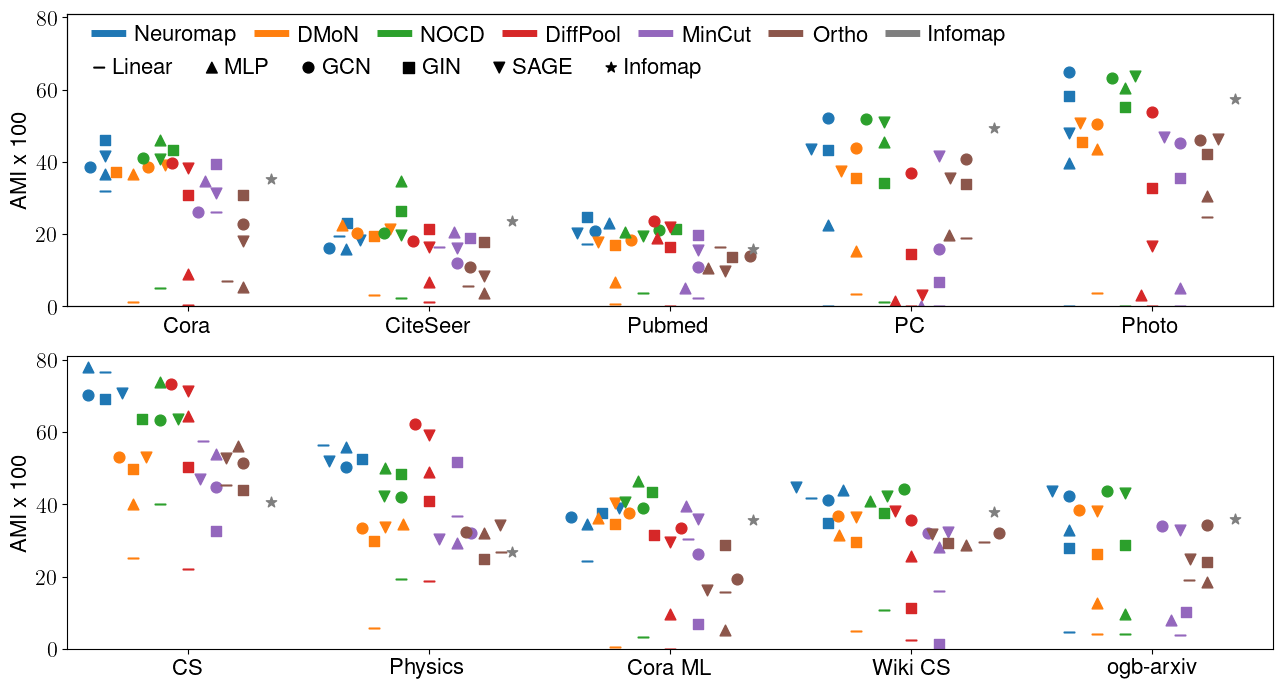

In [11]:
fig, axs = plt.subplots(2, 1, figsize = (13,7))
the_plot_1 = sb.swarmplot(data = molten_part_1, x = "dataset", y = "value", hue = "method", ax = axs[0], dodge = True, legend = None, size = 10, marker = "")
the_plot_2 = sb.swarmplot(data = molten_part_2, x = "dataset", y = "value", hue = "method", ax = axs[1], dodge = True, legend = None, size = 10, marker = "")
for ax in axs:
    ax.set_xlabel("")
    ax.tick_params(axis = "both", labelsize = 16)
    ax.set_xlim(-0.5,4.5)
    ax.set_ylim(0,81)
    ax.set_ylabel("AMI x 100", fontsize = 16)

xyss = []
path_collections = []
for artist in the_plot_1.get_children():
    if type(artist) is matplotlib.collections.PathCollection:
        xyss.append(artist.get_offsets().data)

for ix, dataset in enumerate(list(molten_part_1.dataset.unique()), start = 0):
    xys = np.concatenate(xyss[ix*len(methods):(ix+1)*len(methods)])
    for [x,y],(_,info) in zip(xys, molten_part_1[molten_part_1.dataset == dataset].iterrows()):
        axs[0].scatter(x = x, y = y, marker = arch_shapes[info.arch], c = method_colours[info.method], s = 60)

xyss = []
path_collections = []
for artist in the_plot_2.get_children():
    if type(artist) is matplotlib.collections.PathCollection:
        xyss.append(artist.get_offsets().data)

for ix, dataset in enumerate(list(molten_part_2.dataset.unique()), start = 0):
    xys = np.concatenate(xyss[ix*len(methods):(ix+1)*len(methods)])
    for [x,y],(_,info) in zip(xys, molten_part_2[molten_part_2.dataset == dataset].iterrows()):
        axs[1].scatter(x = x, y = y, marker = arch_shapes[info.arch], c = method_colours[info.method], s = 60)

# build legend
for method in methods:
    axs[0].plot([], [], linestyle = (0, (5, 10)), label = method, color = method_colours[method], linewidth = 5)

twin = axs[0].twinx()
archs = ["lin", "mlp", "gcn", "gin", "sage"]
for arch in archs:
    twin.scatter([], [], linestyle = "", marker = arch_shapes[arch], label = arch_labels[arch], color = "black", s = 60)
twin.scatter([], [], linestyle = "", marker = "*", label = "Infomap", color = "black", s = 60)

axs[0].legend(frameon = False, ncol = 8, columnspacing = 0.7, handletextpad = 0.0, loc = "upper center", bbox_to_anchor = (0.4, 1.03), fontsize = 16)

twin.set_yticklabels([])
twin.set_yticks([])
twin.legend(frameon = False, ncol = 8, columnspacing = 0.7, handletextpad = -0.4, loc = "upper center", bbox_to_anchor = (0.268, 0.92), fontsize = 16)

fig.tight_layout()
plt.savefig(f"real-world-results-ami-dodged.pdf", transparent = True, bbox_inches = "tight")
!pdfcrop real-world-results-ami-dodged.pdf
!mv real-world-results-ami-dodged-crop.pdf real-world-results-ami-dodged.pdf

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `real-world-results-m-dodged-crop.pdf'.


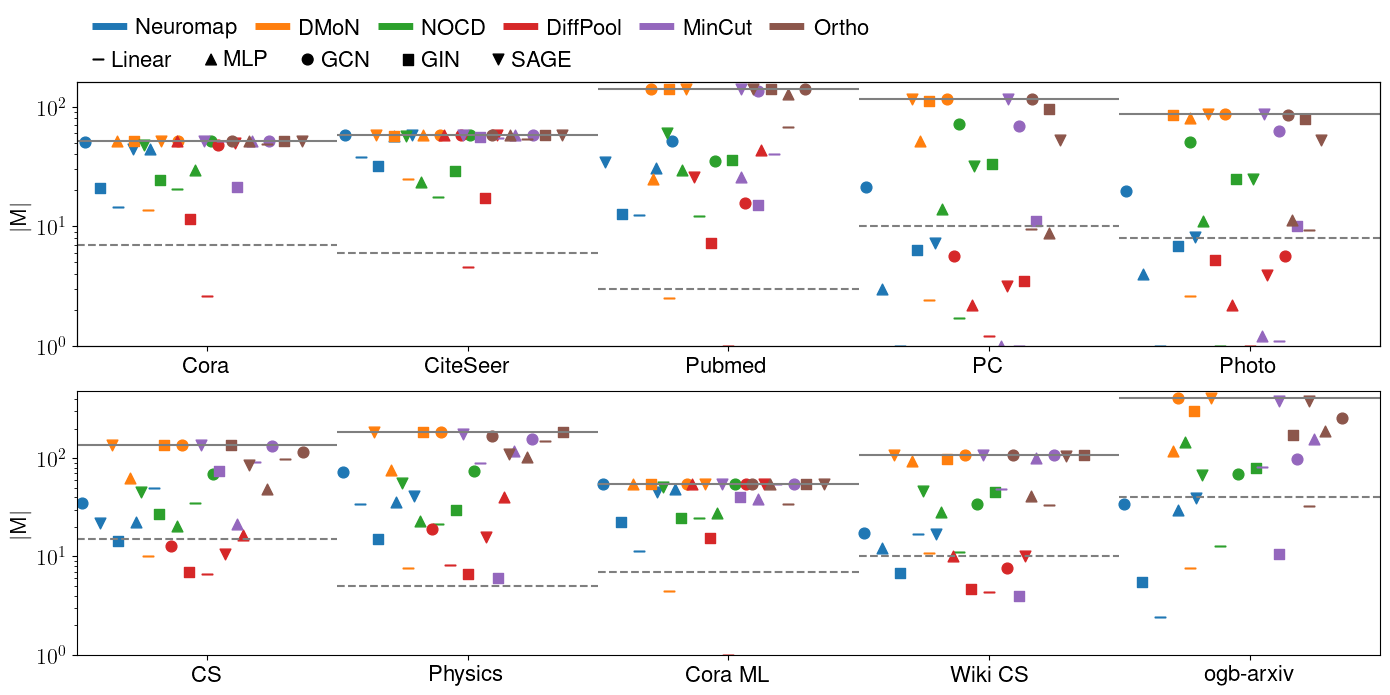

In [12]:
fig, axs = plt.subplots(2, 1, figsize = (14,7))
the_plot_1 = sb.swarmplot(data = molten_m_part_1, x = "dataset", y = "value", hue = "method", ax = axs[0], dodge = True, legend = None, size = 10, marker = "")
the_plot_2 = sb.swarmplot(data = molten_m_part_2, x = "dataset", y = "value", hue = "method", ax = axs[1], dodge = True, legend = None, size = 10, marker = "")
for ax in axs:
    ax.set_xlabel("")
    ax.tick_params(axis = "both", labelsize = 16)
    ax.set_xlim(-0.5,4.5)
    ax.set_yscale("log")
    ax.set_ylabel("$|\mathsf{M}|$", fontsize = 16)

axs[0].set_ylim(1,160)
axs[1].set_ylim(1,480)

xyss = []
path_collections = []
for artist in the_plot_1.get_children():
    if type(artist) is matplotlib.collections.PathCollection:
        xyss.append(artist.get_offsets().data)

for ix, dataset in enumerate(list(molten_m_part_1.dataset.unique()), start = 0):
    xys = np.concatenate(xyss[ix*len(methods):(ix+1)*len(methods)])
    for [x,y],(_,info) in zip(xys, molten_m_part_1[molten_part_1.dataset == dataset].iterrows()):
        if info.method != "Infomap":
            axs[0].scatter(x = x, y = y, marker = arch_shapes[info.arch], c = method_colours[info.method], s = 60)

axs[0].hlines(true_number_of_communities["cora"],-.5,.5, color = sb.color_palette()[7], linestyle = "--")
axs[0].hlines(true_number_of_communities["citeseer"],.5,1.5, color = sb.color_palette()[7], linestyle = "--")
axs[0].hlines(true_number_of_communities["pubmed"],1.5,2.5, color = sb.color_palette()[7], linestyle = "--")
axs[0].hlines(true_number_of_communities["pc"],2.5,3.5, color = sb.color_palette()[7], linestyle = "--")
axs[0].hlines(true_number_of_communities["photo"],3.5,4.5, color = sb.color_palette()[7], linestyle = "--")

axs[0].hlines(max_allowed_number_of_communities["cora"],-.5,.5, color = sb.color_palette()[7])
axs[0].hlines(max_allowed_number_of_communities["citeseer"],.5,1.5, color = sb.color_palette()[7])
axs[0].hlines(max_allowed_number_of_communities["pubmed"],1.5,2.5, color = sb.color_palette()[7])
axs[0].hlines(max_allowed_number_of_communities["pc"],2.5,3.5, color = sb.color_palette()[7])
axs[0].hlines(max_allowed_number_of_communities["photo"],3.5,4.5, color = sb.color_palette()[7])


xyss = []
path_collections = []
for artist in the_plot_2.get_children():
    if type(artist) is matplotlib.collections.PathCollection:
        xyss.append(artist.get_offsets().data)

for ix, dataset in enumerate(list(molten_m_part_2.dataset.unique()), start = 0):
    xys = np.concatenate(xyss[ix*len(methods):(ix+1)*len(methods)])
    for [x,y],(_,info) in zip(xys, molten_m_part_2[molten_part_2.dataset == dataset].iterrows()):
        if info.method != "Infomap":
            axs[1].scatter(x = x, y = y, marker = arch_shapes[info.arch], c = method_colours[info.method], s = 60)

# build legend
for method in methods:
    if method != "Infomap":
        axs[0].plot([], [], linestyle = (0, (5, 10)), label = method, color = method_colours[method], linewidth = 5)

axs[1].hlines(true_number_of_communities["cs"],-.5,.5, color = sb.color_palette()[7], linestyle = "--")
axs[1].hlines(true_number_of_communities["physics"],.5,1.5, color = sb.color_palette()[7], linestyle = "--")
axs[1].hlines(true_number_of_communities["cora_ml"],1.5,2.5, color = sb.color_palette()[7], linestyle = "--")
axs[1].hlines(true_number_of_communities["wiki_cs"],2.5,3.5, color = sb.color_palette()[7], linestyle = "--")
axs[1].hlines(true_number_of_communities["arxiv"],3.5,4.5, color = sb.color_palette()[7], linestyle = "--")

axs[1].hlines(max_allowed_number_of_communities["cs"],-.5,.5, color = sb.color_palette()[7])
axs[1].hlines(max_allowed_number_of_communities["physics"],.5,1.5, color = sb.color_palette()[7])
axs[1].hlines(max_allowed_number_of_communities["cora_ml"],1.5,2.5, color = sb.color_palette()[7])
axs[1].hlines(max_allowed_number_of_communities["wiki_cs"],2.5,3.5, color = sb.color_palette()[7])
axs[1].hlines(max_allowed_number_of_communities["arxiv"],3.5,4.5, color = sb.color_palette()[7])


twin = axs[0].twinx()
archs = ["lin", "mlp", "gcn", "gin", "sage"]
for arch in archs:
    twin.scatter([], [], linestyle = "", marker = arch_shapes[arch], label = arch_labels[arch], color = "black", s = 60)

axs[0].legend(frameon = False, ncol = 8, columnspacing = 0.7, handletextpad = 0.0, loc = "upper center", bbox_to_anchor = (0.31, 1.32), fontsize = 16)

twin.set_yticklabels([])
twin.set_yticks([])
twin.legend(frameon = False, ncol = 8, columnspacing = 0.7, handletextpad = -0.4, loc = "upper center", bbox_to_anchor = (0.19, 1.2), fontsize = 16)

fig.tight_layout()
plt.savefig(f"real-world-results-m-dodged.pdf", transparent = True, bbox_inches = "tight")
!pdfcrop real-world-results-m-dodged.pdf
!mv real-world-results-m-dodged-crop.pdf real-world-results-m-dodged.pdf

## Results for 512 hidden channels and setting $s = |Y|$

In [13]:
max_allowed_number_of_communities = true_number_of_communities

In [14]:
cora     = pd.read_csv("results/real-world-fixed-size-arch/Cora.csv", index_col = None)
citeseer = pd.read_csv("results/real-world-fixed-size-arch/CiteSeer.csv", index_col = None)
pubmed   = pd.read_csv("results/real-world-fixed-size-arch/PubMed.csv", index_col = None)
pc       = pd.read_csv("results/real-world-fixed-size-arch/PC.csv")
photo    = pd.read_csv("results/real-world-fixed-size-arch/Photo.csv")
cs       = pd.read_csv("results/real-world-fixed-size-arch/CS.csv")
physics  = pd.read_csv("results/real-world-fixed-size-arch/Physics.csv")
cora_ml  = pd.read_csv("results/real-world-fixed-size-arch/Cora-ML.csv")
wiki_cs  = pd.read_csv("results/real-world-fixed-size-arch/WikiCS.csv")
arxiv    = pd.read_csv("results/real-world-fixed-size-arch/arxiv.csv")

cora["dataset"]     = "Cora"
citeseer["dataset"] = "CiteSeer"
pubmed["dataset"]   = "Pubmed"
pc["dataset"]       = "PC"
photo["dataset"]    = "Photo"
cs["dataset"]       = "CS"
physics["dataset"]  = "Physics"
cora_ml["dataset"]  = "Cora ML"
wiki_cs["dataset"]  = "Wiki CS"
arxiv["dataset"]    = "ogb-arxiv"

In [15]:
part1 = pd.concat([cora, citeseer, pubmed, pc, photo])
part2 = pd.concat([cs, physics, cora_ml, wiki_cs, arxiv])

molten_part_1 = pd.melt(part1, id_vars = ["method", "arch", "dataset"], value_vars = "avg ami")
molten_part_1 = pd.concat([molten_part_1[molten_part_1.method == method] for method in methods])

molten_part_2 = pd.melt(part2, id_vars = ["method", "arch", "dataset"], value_vars = "avg ami")
molten_part_2 = pd.concat([molten_part_2[molten_part_2.method == method] for method in methods])


molten_m_part_1 = pd.melt(part1, id_vars = ["method", "arch", "dataset"], value_vars = "avg m")
molten_m_part_1 = pd.concat([molten_m_part_1[molten_m_part_1.method == method] for method in methods])

molten_m_part_2 = pd.melt(part2, id_vars = ["method", "arch", "dataset"], value_vars = "avg m")
molten_m_part_2 = pd.concat([molten_m_part_2[molten_m_part_2.method == method] for method in methods])

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `real-world-results-ami-dodged-fixed-arch-crop.pdf'.


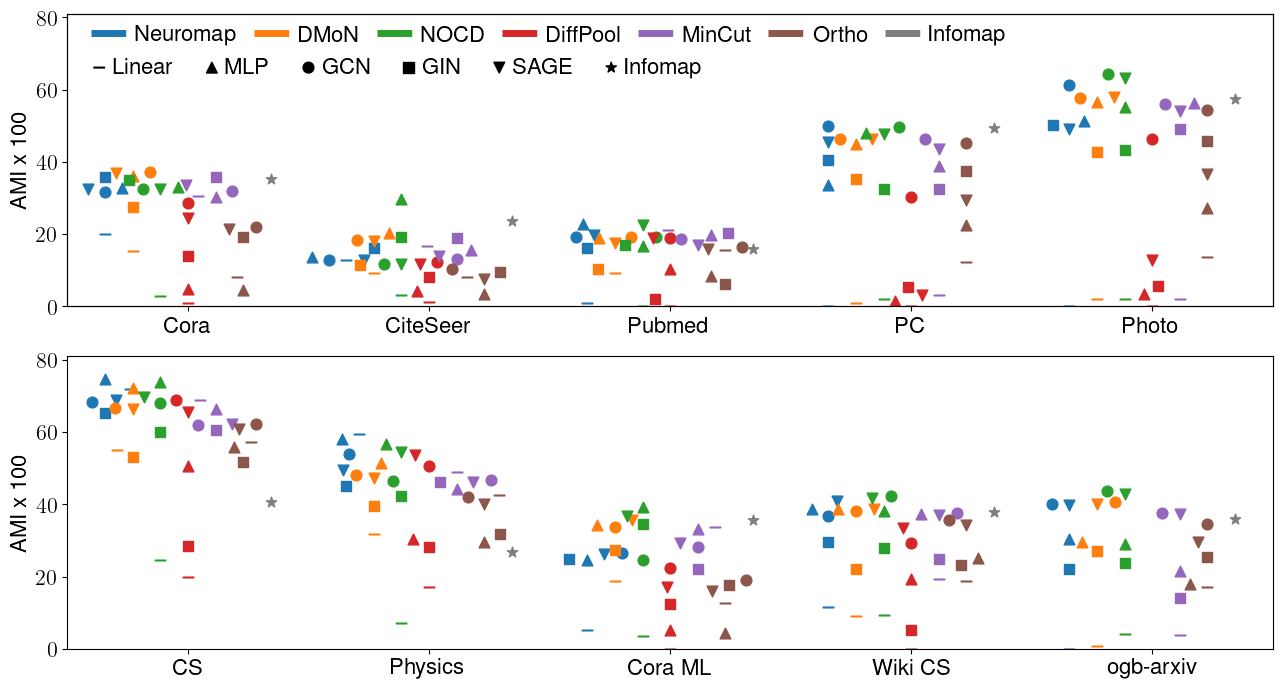

In [16]:
fig, axs = plt.subplots(2, 1, figsize = (13,7))
the_plot_1 = sb.swarmplot(data = molten_part_1, x = "dataset", y = "value", hue = "method", ax = axs[0], dodge = True, legend = None, size = 10, marker = "")
the_plot_2 = sb.swarmplot(data = molten_part_2, x = "dataset", y = "value", hue = "method", ax = axs[1], dodge = True, legend = None, size = 10, marker = "")
for ax in axs:
    ax.set_xlabel("")
    ax.tick_params(axis = "both", labelsize = 16)
    ax.set_xlim(-0.5,4.5)
    ax.set_ylim(0,81)
    ax.set_ylabel("AMI x 100", fontsize = 16)

xyss = []
path_collections = []
for artist in the_plot_1.get_children():
    if type(artist) is matplotlib.collections.PathCollection:
        xyss.append(artist.get_offsets().data)

for ix, dataset in enumerate(list(molten_part_1.dataset.unique()), start = 0):
    xys = np.concatenate(xyss[ix*len(methods):(ix+1)*len(methods)])
    for [x,y],(_,info) in zip(xys, molten_part_1[molten_part_1.dataset == dataset].iterrows()):
        axs[0].scatter(x = x, y = y, marker = arch_shapes[info.arch], c = method_colours[info.method], s = 60)

xyss = []
path_collections = []
for artist in the_plot_2.get_children():
    if type(artist) is matplotlib.collections.PathCollection:
        xyss.append(artist.get_offsets().data)

for ix, dataset in enumerate(list(molten_part_2.dataset.unique()), start = 0):
    xys = np.concatenate(xyss[ix*len(methods):(ix+1)*len(methods)])
    for [x,y],(_,info) in zip(xys, molten_part_2[molten_part_2.dataset == dataset].iterrows()):
        axs[1].scatter(x = x, y = y, marker = arch_shapes[info.arch], c = method_colours[info.method], s = 60)

# build legend
for method in methods:
    axs[0].plot([], [], linestyle = (0, (5, 10)), label = method, color = method_colours[method], linewidth = 5)

twin = axs[0].twinx()
archs = ["lin", "mlp", "gcn", "gin", "sage"]
for arch in archs:
    twin.scatter([], [], linestyle = "", marker = arch_shapes[arch], label = arch_labels[arch], color = "black", s = 60)
twin.scatter([], [], linestyle = "", marker = "*", label = "Infomap", color = "black", s = 60)

axs[0].legend(frameon = False, ncol = 8, columnspacing = 0.7, handletextpad = 0.0, loc = "upper center", bbox_to_anchor = (0.4, 1.03), fontsize = 16)

twin.set_yticklabels([])
twin.set_yticks([])
twin.legend(frameon = False, ncol = 8, columnspacing = 0.7, handletextpad = -0.4, loc = "upper center", bbox_to_anchor = (0.268, 0.92), fontsize = 16)

fig.tight_layout()
plt.savefig(f"real-world-results-ami-dodged-fixed-arch.pdf", transparent = True, bbox_inches = "tight")
!pdfcrop real-world-results-ami-dodged-fixed-arch.pdf
!mv real-world-results-ami-dodged-fixed-arch-crop.pdf real-world-results-ami-dodged-fixed-arch.pdf

PDFCROP 1.42, 2023/04/15 - Copyright (c) 2002-2023 by Heiko Oberdiek, Oberdiek Package Support Group.
==> 1 page written on `real-world-results-m-dodged-fixed-arch-crop.pdf'.


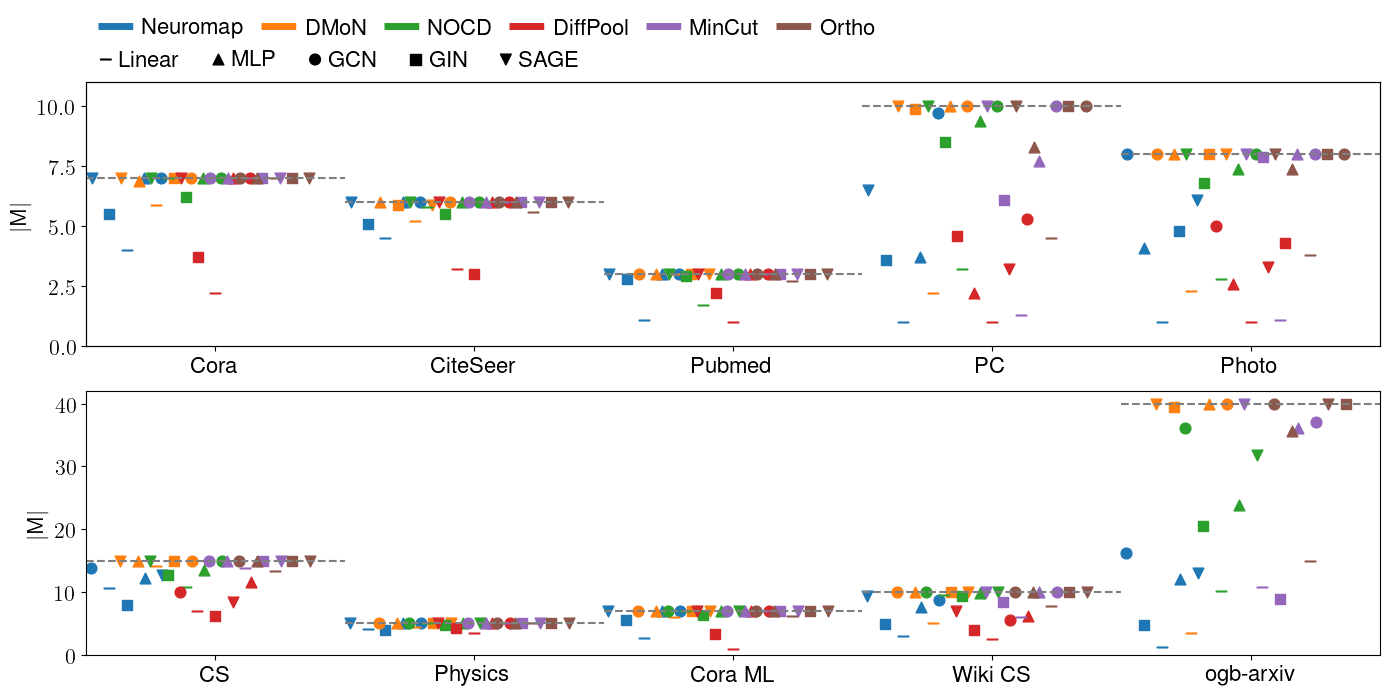

In [17]:
fig, axs = plt.subplots(2, 1, figsize = (14,7))
the_plot_1 = sb.swarmplot(data = molten_m_part_1, x = "dataset", y = "value", hue = "method", ax = axs[0], dodge = True, legend = None, size = 10, marker = "")
the_plot_2 = sb.swarmplot(data = molten_m_part_2, x = "dataset", y = "value", hue = "method", ax = axs[1], dodge = True, legend = None, size = 10, marker = "")
for ax in axs:
    ax.set_xlabel("")
    ax.tick_params(axis = "both", labelsize = 16)
    ax.set_xlim(-0.5,4.5)
    ax.set_ylabel("$|\mathsf{M}|$", fontsize = 16)

axs[0].set_ylim(0,11)
axs[1].set_ylim(0,42)

xyss = []
path_collections = []
for artist in the_plot_1.get_children():
    if type(artist) is matplotlib.collections.PathCollection:
        xyss.append(artist.get_offsets().data)

for ix, dataset in enumerate(list(molten_m_part_1.dataset.unique()), start = 0):
    xys = np.concatenate(xyss[ix*len(methods):(ix+1)*len(methods)])
    for [x,y],(_,info) in zip(xys, molten_m_part_1[molten_part_1.dataset == dataset].iterrows()):
        if info.method != "Infomap":
            axs[0].scatter(x = x, y = y, marker = arch_shapes[info.arch], c = method_colours[info.method], s = 60)

axs[0].hlines(true_number_of_communities["cora"],-.5,.5, color = sb.color_palette()[7], linestyle = "--")
axs[0].hlines(true_number_of_communities["citeseer"],.5,1.5, color = sb.color_palette()[7], linestyle = "--")
axs[0].hlines(true_number_of_communities["pubmed"],1.5,2.5, color = sb.color_palette()[7], linestyle = "--")
axs[0].hlines(true_number_of_communities["pc"],2.5,3.5, color = sb.color_palette()[7], linestyle = "--")
axs[0].hlines(true_number_of_communities["photo"],3.5,4.5, color = sb.color_palette()[7], linestyle = "--")


xyss = []
path_collections = []
for artist in the_plot_2.get_children():
    if type(artist) is matplotlib.collections.PathCollection:
        xyss.append(artist.get_offsets().data)

for ix, dataset in enumerate(list(molten_m_part_2.dataset.unique()), start = 0):
    xys = np.concatenate(xyss[ix*len(methods):(ix+1)*len(methods)])
    for [x,y],(_,info) in zip(xys, molten_m_part_2[molten_part_2.dataset == dataset].iterrows()):
        if info.method != "Infomap":
            axs[1].scatter(x = x, y = y, marker = arch_shapes[info.arch], c = method_colours[info.method], s = 60)

# build legend
for method in methods:
    if method != "Infomap":
        axs[0].plot([], [], linestyle = (0, (5, 10)), label = method, color = method_colours[method], linewidth = 5)

axs[1].hlines(true_number_of_communities["cs"],-.5,.5, color = sb.color_palette()[7], linestyle = "--")
axs[1].hlines(true_number_of_communities["physics"],.5,1.5, color = sb.color_palette()[7], linestyle = "--")
axs[1].hlines(true_number_of_communities["cora_ml"],1.5,2.5, color = sb.color_palette()[7], linestyle = "--")
axs[1].hlines(true_number_of_communities["wiki_cs"],2.5,3.5, color = sb.color_palette()[7], linestyle = "--")
axs[1].hlines(true_number_of_communities["arxiv"],3.5,4.5, color = sb.color_palette()[7], linestyle = "--")


twin = axs[0].twinx()
archs = ["lin", "mlp", "gcn", "gin", "sage"]
for arch in archs:
    twin.scatter([], [], linestyle = "", marker = arch_shapes[arch], label = arch_labels[arch], color = "black", s = 60)

axs[0].legend(frameon = False, ncol = 8, columnspacing = 0.7, handletextpad = 0.0, loc = "upper center", bbox_to_anchor = (0.31, 1.32), fontsize = 16)

twin.set_yticklabels([])
twin.set_yticks([])
twin.legend(frameon = False, ncol = 8, columnspacing = 0.7, handletextpad = -0.4, loc = "upper center", bbox_to_anchor = (0.19, 1.2), fontsize = 16)

fig.tight_layout()
plt.savefig(f"real-world-results-m-dodged-fixed-arch.pdf", transparent = True, bbox_inches = "tight")
!pdfcrop real-world-results-m-dodged-fixed-arch.pdf
!mv real-world-results-m-dodged-fixed-arch-crop.pdf real-world-results-m-dodged-fixed-arch.pdf